In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95%}</style>"))
import sys
print(sys.executable) 
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import seaborn as sns
from sklearn import preprocessing

from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
El codigo Python de este cuaderno está oculto para facilitar la lectura.
Para mostrar/ocultar el código, haz click <a href="javascript:code_toggle()">aquí.</a>.''')

## Load metrics

In [2]:
import pandas as pd
df_alg=pd.read_csv('../output/metrics2309/merged_output_umda.txt')
convert_dict = {'Dataset': "string", 
                'Algorithm': "string",
                'Population Length': "int64",
                'Generations': "int64",
                'Time(s)': "float64",
                'AvgValue': "float64",
                'BestAvgValue': "float64",
                'BestGeneration': "int64",
                'HV': "float64",
                'Spread': "float64",
                'NumSolutions': "float64",
                'Spacing': "float64",
                'NumGenerations': "int64"
               } 
#df_alg = df_alg.astype(convert_dict) 

df_alg2=pd.read_csv('../output/metrics2309/merged_output_pbil.txt',header=0)

convert_dict = {'Dataset': "string", 
                'Algorithm': "string",
                'Population Length': "int64",
                'Generations': "int64",
                'Time(s)': "float64",
                'AvgValue': "float64",
                'BestAvgValue': "float64",
                'HV': "float64",
                'Spread': "float64",
                'NumSolutions': "int64",
                'Spacing': "float64",
                'NumGenerations': "int64"
               } 
#df_alg2 = df_alg2.astype(convert_dict)
#display(df_alg2.head(200))

df_alg = df_alg.append(df_alg2)
display(df_alg.head(200))

,Dataset,Algorithm,Population Length,Generations,Evaluations,Selected Individuals,Time(s),AvgValue,BestAvgValue,BestGeneration,HV,Spread,NumSolutions,Spacing,NumGenerations,Requirements per sol,NumEvaluations,Learning Rate,Mutation Probability,Mutation Shift
0,s2,UMDAAlgorithm,100,200,0,20.0,37.655720,0.443520,0.475226,NaN,0.052778,0.584769,179,0.056894,200,43.206704,20100,NaN,NaN,NaN
1,s2,UMDAAlgorithm,100,200,0,20.0,33.743408,0.449738,0.479470,NaN,0.058828,0.608295,181,0.052127,200,44.546961,20100,NaN,NaN,NaN
2,s2,UMDAAlgorithm,100,200,0,20.0,24.256423,0.456849,0.477811,NaN,0.063346,0.719702,121,0.047110,200,46.082645,20100,NaN,NaN,NaN
3,s2,UMDAAlgorithm,100,200,0,20.0,33.498494,0.447628,0.476912,NaN,0.064665,0.609570,174,0.054316,200,44.511494,20100,NaN,NaN,NaN
4,s2,UMDAAlgorithm,100,200,0,20.0,27.982597,0.456661,0.479724,NaN,0.053615,0.591490,127,0.043057,200,45.574803,20100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,UMDAAlgorithm,100,100,10000,20.0,13.105150,0.520022,0.538265,NaN,0.050662,0.623833,132,0.046045,98,60.446970,10000,NaN,NaN,NaN
196,2,UMDAAlgorithm,100,100,10000,20.0,13.908374,0.499446,0.527943,NaN,0.035954,0.587919,208,0.038599,98,56.451923,10000,NaN,NaN,NaN
197,2,UMDAAlgorithm,100,100,10000,20.0,8.990556,0.507211,0.529666,NaN,0.033688,0.729350,94,0.039222,98,56.372340,10000,NaN,NaN,NaN
198,2,UMDAAlgorithm,100,100,10000,20.0,9.411966,0.531799,0.547228,NaN,0.026664,0.670511,88,0.039075,98,63.284091,10000,NaN,NaN,NaN


In [4]:
configs=["Algorithm","Dataset"]

df_a=(
    df_alg[df_alg["Evaluations"]==0].groupby(configs)\
    [['Time(s)', 'HV', 'Spread',"AvgValue","NumSolutions","Spacing","Requirements per sol","NumEvaluations"]]\
    .agg(mean_time=('Time(s)', 'mean'),
         mean_hv=('HV', 'mean'),
         mean_spread=('Spread', 'mean'),
         mean_avgvalue=('AvgValue', 'mean'),
         mean_numsolutions=('NumSolutions', 'mean'),
         mean_spacing=('Spacing', 'mean'),
         mean_reqs_per_sol=('Requirements per sol', 'mean'),
         mean_numevaluations=('NumEvaluations', 'mean'),
        )
)
display(df_a)

mean_time   mean_hv  mean_spread  mean_avgvalue  \
Algorithm     Dataset                                                     
PBILAlgorithm 1         17.827713  0.557691     0.656180       0.571990   
              2         31.106527  0.205686     0.690879       0.490543   
              s1        29.050152  0.411403     0.639838       0.496798   
              s2        47.425649  0.326308     0.720749       0.454634   
              s3        35.166382  0.185856     0.716891       0.460804   
UMDAAlgorithm 1         29.916250  0.254448     0.659283       0.569399   
              2        161.980487  0.048931     0.635634       0.507003   
              s1        81.053194  0.179093     0.613683       0.497996   
              s2       122.776086  0.085294     0.619632       0.453881   
              s3       131.024540  0.033151     0.656146       0.493005   

                       mean_numsolutions  mean_spacing  mean_reqs_per_sol  \
Algorithm     Dataset                                                       
PBILAlgorithm 1                36.168056      0.247495          12.372599   
              2                69.725000      0.099498          66.073382   
              s1               79.426389      0.130748          26.760934   
              s2               97.812500      0.120269          56.178203   
              s3               73.145833      0.097099          94.435216   
UMDAAlgorithm 1                28.700000      0.202296          10.893753   
              2               220.944444      0.043697          57.250284   
              s1               96.411111      0.107756          22.489497   
              s2              187.433333      0.052862          45.567887   
              s3              174.388889      0.034619          84.684215   

                       mean_numevaluations  
Algorithm     Dataset                       
PBILAlgorithm 1               71111.111111  
              2               71111.111111  
              s1              71111.111111  
              s2              71111.111111  
              s3              71111.111111  
UMDAAlgorithm 1               71377.777778  
              2               71377.777778  
              s1              71377.777778  
              s2              71377.777778  
              s3              71377.777778

## Pareto analysis
Change ```dataset``` value to load different dataset Paretos


NDS created has 73 solution(s)

NDS created has 46 solution(s)


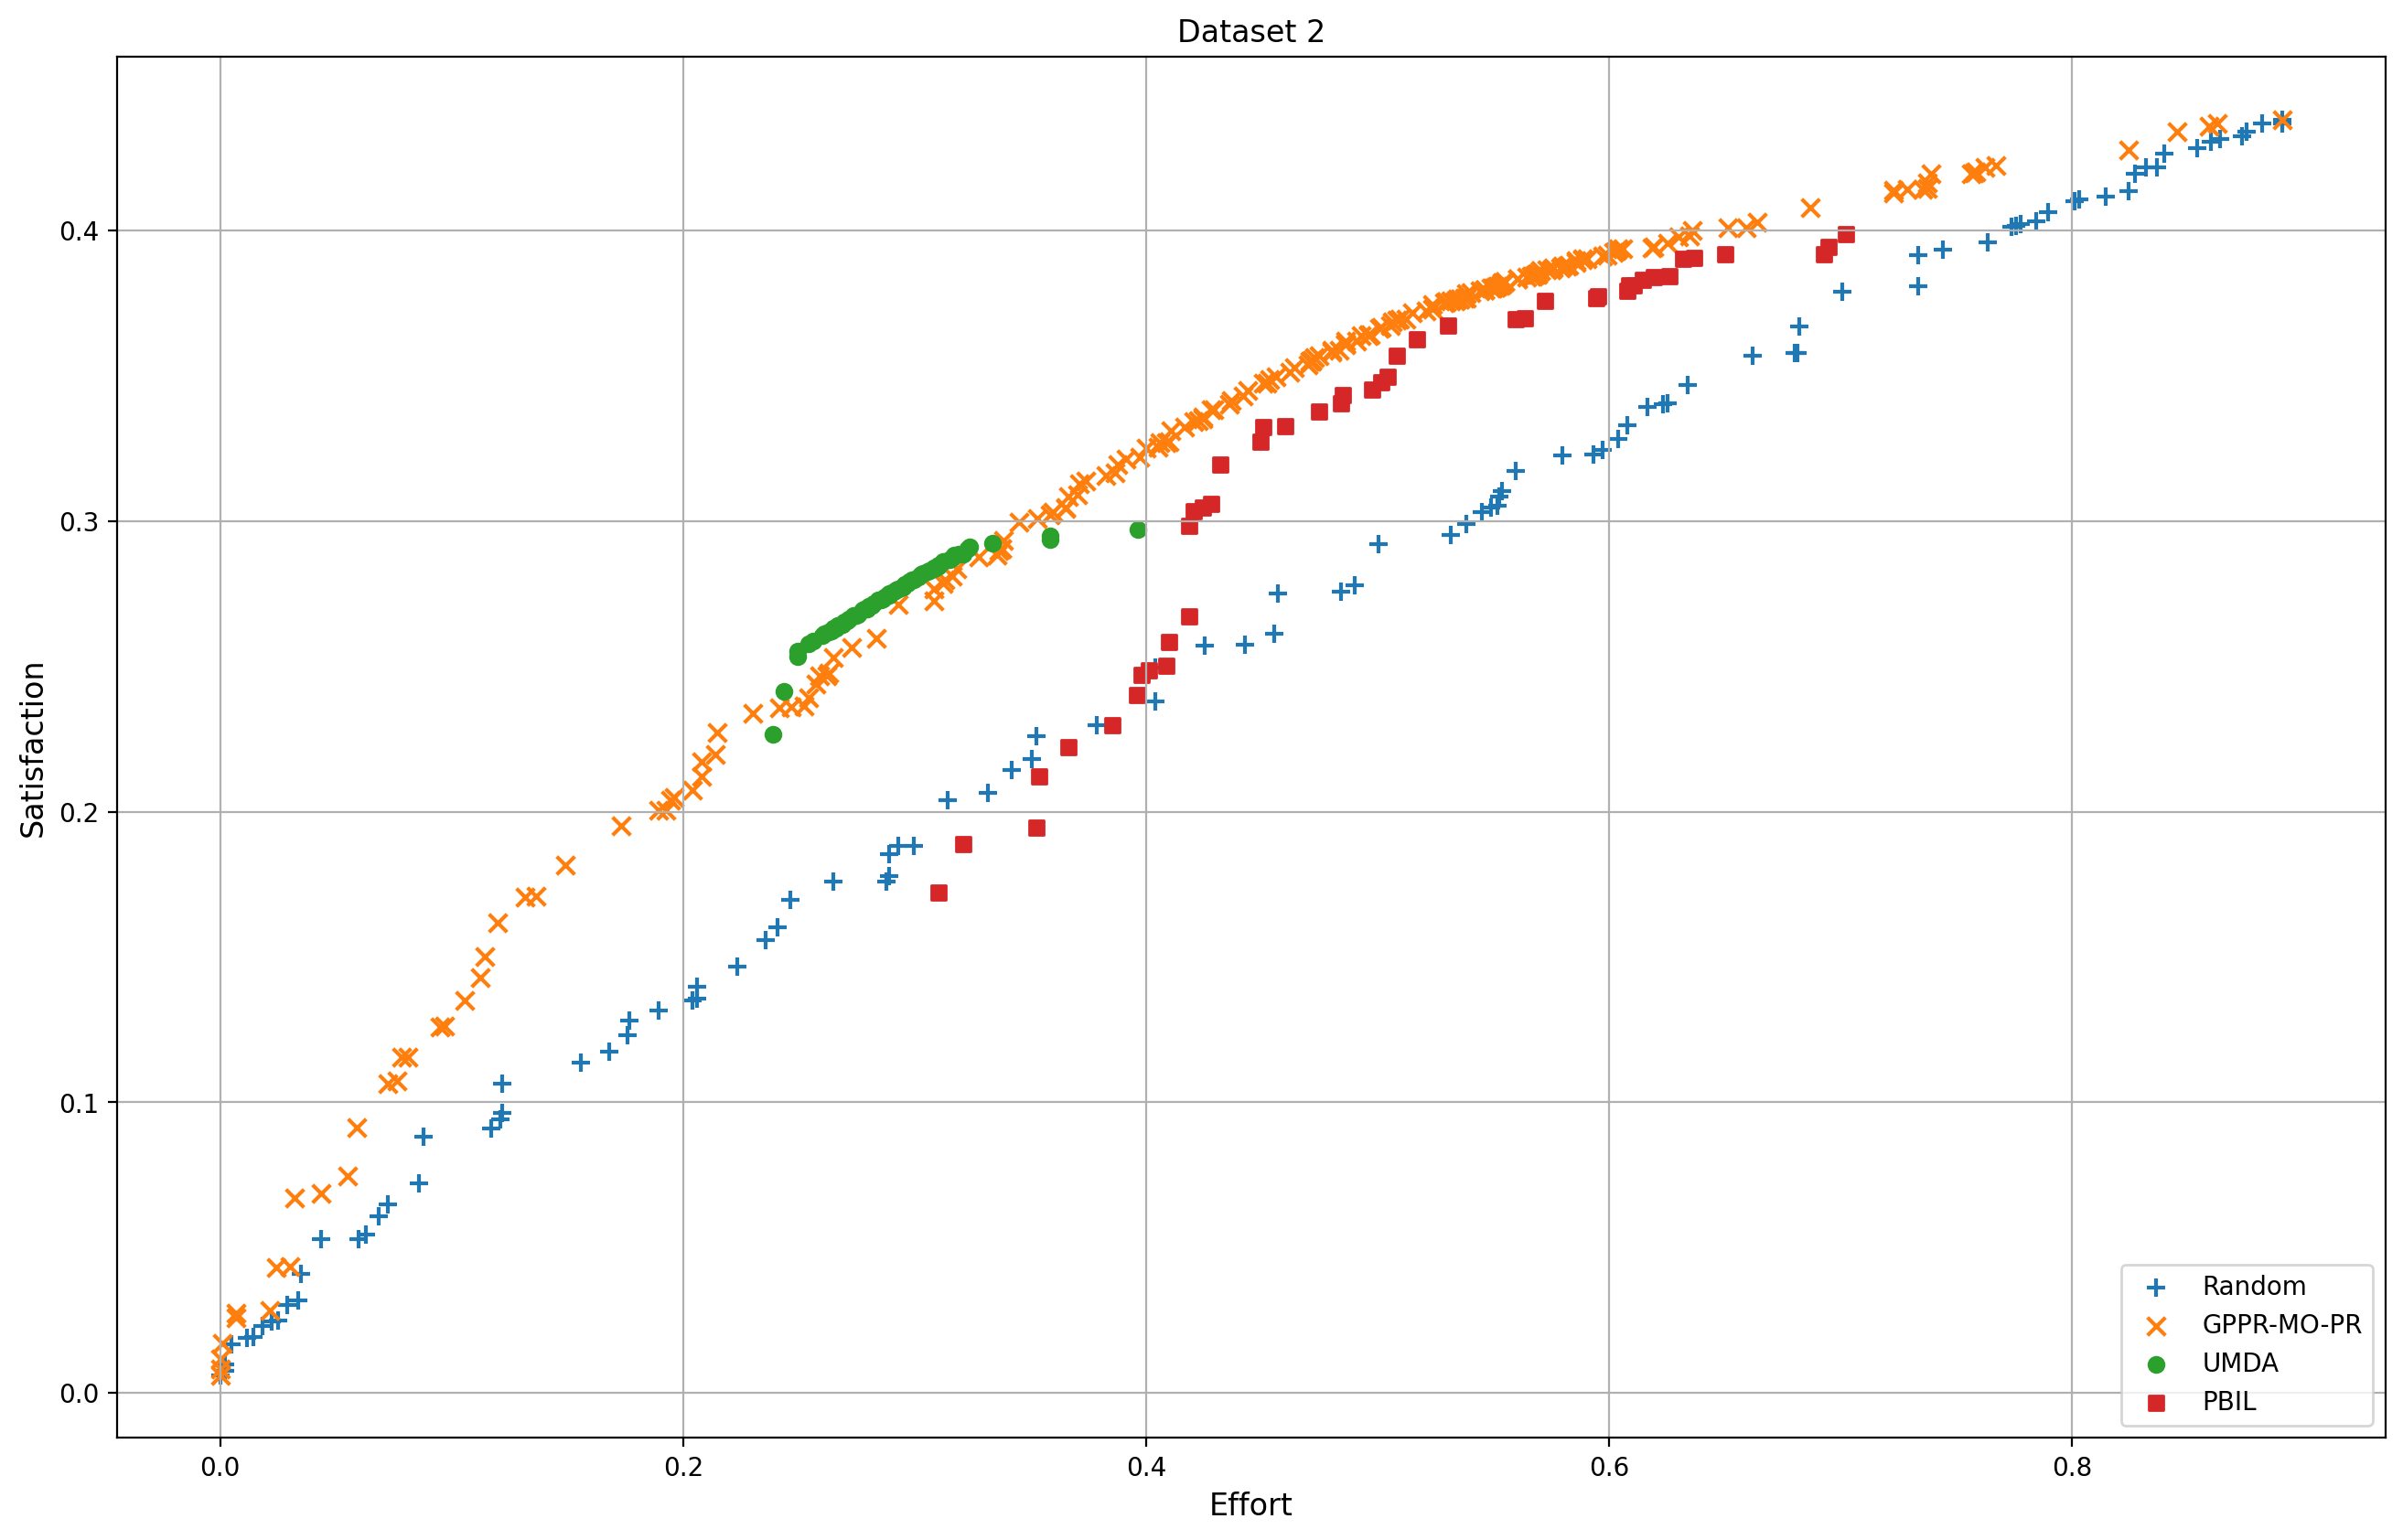

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from algorithms.GRASP.GRASP import GRASP
from algorithms.genetic.nsgaii.nsgaii_algorithm import NSGAIIAlgorithm
from algorithms.genetic.geneticnds.geneticnds_algorithm import GeneticNDSAlgorithm
from algorithms.EDA.UMDA.umda_algorithm import UMDAAlgorithm
from algorithms.EDA.PBIL.pbil_algorithm import PBILAlgorithm 
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

sizes=[30,25,20,15,10,7,5]
markers=["+","x","s","v","h","o"]
labels=["Random","GPPR-MO-PR"]
datasets=["1","2","s1","s2","s3"]
dataset="2"
seed=10
generations=100
solutions_per_iteration=100
population_length=100
gens_genetic=100
algorithms = [
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="uniform",local_search_type="None",path_relinking_mode="None"),
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="stochastically",local_search_type="best_first_neighbor_random_domination",
          path_relinking_mode="after_local"),
    #UMDAAlgorithm(dataset_name=dataset,population_length=population_length,max_generations=generations,
    #             max_evaluations=0,selected_individuals=50)
]

for i in range(len(algorithms)):   
    if "GRASP" in algorithms[i].file:
        file = "../output/output/pareto-grasp-"+algorithms[i].file
    else:
        file = "../output/output/pareto-genetic-"+algorithms[i].file
    data = np.loadtxt(file,delimiter=',', dtype=float)
    x,y=data.T
    plt.scatter(x,y,label=labels[i],s=50,marker=markers[i])

algorithm=UMDAAlgorithm(dataset_name=dataset,population_length=100,max_generations=100,
             max_evaluations=0,selected_individuals=50)
result=algorithm.run()
func = [i.objectives for i in result["population"]]
function1 = [i[0].value for i in func]
function2 = [i[1].value for i in func]
plt.scatter(function2, function1, marker='o',label="UMDA")

algorithm=PBILAlgorithm(dataset_name=dataset,population_length=population_length,max_generations=100,
             max_evaluations=0,learning_rate=0.2,mutation_prob=0.2,mutation_shift=0.2)
result=algorithm.run()
func = [i.objectives for i in result["population"]]
function3 = [i[0].value for i in func]
function4 = [i[1].value for i in func]
plt.scatter(function4, function3, marker='s',label="PBIL")





#file = "output/backtracking.txt"
#data = np.loadtxt(file,delimiter=',', dtype=float)
#x,y=data.T
#plt.scatter(x,y,label="optimo",s=10)
plt.title(dataset)
plt.xlabel('Effort', fontsize=12)
plt.ylabel('Satisfaction', fontsize=12)
plt.legend(loc="lower right")
plt.title("Dataset "+dataset)
plt.grid(True)
plt.show()

## Metrics analysis

In [ ]:
from sklearn import preprocessing
from scipy.stats import ranksums
import numpy as np
import plotly.graph_objects as go
import plotly.offline as pyo
import math
class AlgorithmDataGenetic():
    def __init__(self,a,rs,d,p,g,ss,sc,cs,cp,ms,mp):
        self.a=a
        self.rs=rs
        self.d=d
        self.p=p
        self.g=g
        self.ss=ss
        self.sc=sc
        self.cs=cs
        self.cp=cp
        self.ms=ms
        self.mp=mp
    
    def findConfigurationData(self,df):
        return df[(df["Population Length"]==self.p)&(df["Generations"]==self.g)
                     &(df["Selection Scheme"]==self.ss)&(df["Selection Candidates"]==self.sc)
                     &(df["Crossover Scheme"]==self.cs)&(df["Crossover Probability"]==self.cp)
                     &(df["Mutation Scheme"]==self.ms)&(df["Mutation Probability"]==self.mp)
              &(df["Algorithm"]==self.a)&(df["Replacement Scheme"]==self.rs)
              &(df["Dataset"]==self.d)
             ]
        
class AlgorithmDataGrasp():
    def __init__(self,a,d,it,so,ini,ls,pr):
        self.a=a
        self.it=it
        self.so=so
        self.ls=ls
        self.d=d
        self.ini=ini
        self.pr=pr
        
    def findConfigurationData(self,df):
        return df[(df["Iterations"]==self.it)&(df["Solutions per Iteration"]==self.so)
              &(df["Local Search Type"]==self.ls)&(df["Initialization Type"]==self.ini)
              &(df["Algorithm"]==self.a)&(df["Dataset"]==self.d)&(df["Path Relinking"]==self.pr)
             ]
    
dat="1"

datasets=["1","2","s1","s2","s3"]

cols=["HV","Spread","Spacing","NumSolutions","Time(s)"]
maxmin=[1,-1,1,1,-1]
for dat in datasets:
    print("------Dataset "+dat+"-----")
    algs = [
        AlgorithmDataGenetic("GeneticNDSAlgorithm",'elitism',dat,100,100,"tournament",2,"onepoint",0.8,"flip1bit",1.0),
        AlgorithmDataGenetic("NSGAIIAlgorithm",'elitism',dat,100,100,"tournament",2,"onepoint",0.6,"flip1bit",1.0),
        AlgorithmDataGrasp("GRASP",dat,100,100,"stochastically","best_first_neighbor_random_domination","after_local"),
    ]
    for j in range(len(cols)): 
        print(cols[j])
        results=list()
        best_avg=0
        best_avgn=10**9
        best_alg_index=None
        for i in range(len(algs)):
            avg=np.mean((algs[i].findConfigurationData(df_alg)[cols])[cols[j]].values)
            results.append("{:.3f}".format(avg))
            if maxmin[j]>0 and avg>best_avg:
                best_avg=avg
                best_alg_index=i
            elif maxmin[j]<0 and avg<best_avgn:
                best_avgn=avg
                best_alg_index=i

        p_best=True
        p_list=[]
        for i in range(len(algs)):
            if i!=best_alg_index:
                dataA=(algs[best_alg_index].findConfigurationData(df_alg)[cols])[cols[j]].values
                dataB=(algs[i].findConfigurationData(df_alg)[cols])[cols[j]].values
                _, p = ranksums(dataA, dataB)
                print("p:",p)
                if p>=0.05:
                    #print(dataA)
                    #print(dataB)
                    p_best=False
                else:
                    p_list.append(i)

        if p_best:
            mark = '*'
        else:
            mark = ''
        for index in p_list:
            results[index]=results[index]+'-'
        #results[best_alg_index]=results[best_alg_index]+mark
        results.insert(0,cols[j])
        print(results)


In [ ]:
a = np.random.choice(2, 5)
print(a)
costs=np.array([1,2,3,4,5])
indexes=np.array(a).nonzero()
print( costs[indexes])